In [1]:
import numpy as np
import cv2
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
train_cat = os.path.join('C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/training_set/training_set/cats')
#C:/Users/natdanai.intraraksa/Downloads/cat-and-dog/training_set/training_set/cats
train_dog = os.path.join('C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/training_set/training_set/dogs')
#test dataset for cats
test_cat = os.path.join('C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/test_set/test_set/cats')
#test dataset for dogs
train_dog = os.path.join('C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/test_set/test_set/dogs')

In [15]:
name_cat = os.listdir(train_cat)
name_dog = os.listdir(train_dog)

In [5]:
print('Length of cat_train {}'.format(len(os.listdir(train_cat))))
print('Length of dog_train {}'.format(len(os.listdir(train_dog))))

Length of cat_train 4001
Length of dog_train 4006


In [6]:
train_cat_name = [os.path.join(train_cat,fname) for fname in name_cat[:5]]
train_dog_name = [os.path.join(train_dog,fname) for fname in name_dog[:5]]

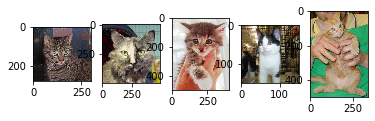

In [7]:
f,ax = plt.subplots(1,5)
for i,j in enumerate(train_cat_name):
    img = plt.imread(j)
    ax[i].imshow(img)
plt.show()

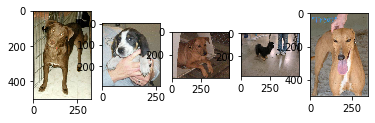

In [8]:
f,ax = plt.subplots(1,5)
for i,j in enumerate(train_dog_name):
    img = plt.imread(j)
    ax[i].imshow(img)
plt.show()

In [9]:
import tensorflow as tf
from tensorflow import keras

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (300,300,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

In [13]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metric = ['acc'])

W0205 21:56:02.701273  9912 deprecation.py:323] From C:\Users\n_int\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)